In [1]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# 구글 드라이브 파일 확인
!ls '/gdrive/My Drive/temp/'

# 반복되는 드라이브 경로 변수화
drive_path = '/gdrive/My Drive/temp/'

Mounted at /gdrive
 매수종목1.txt		   ml_class.png		   stock-data.csv
 매수종목2.txt		   pca_1.png		  'stock price.xlsx'
 adult.data		   pca_2.png		  'stock valuation.xlsx'
 auto-mpg.csv		   pca_3.png		   test.db.db
 bmi_500.csv		   Picture1.png		   test.txt
 citibike.csv		   population_number.csv   text.txt
 매수종목.csv		   ram_price.csv	   ThoraricSurgery.csv
 data_mine.csv		   ratings_small.txt	   titanic.xls
 data_population.csv	   ratings_test.txt	   tmdb_5000_credits.csv
 data_studentlist_en.csv   ratings_train.txt	   tmdb_5000_movies.csv
 demo.docx		   sample1.pdf		   Traffic_Accident_2017.csv
 diabetes.csv		   sample2.pdf		   train.csv
 example.docx		   sample.docx		   user_id_mean.csv
 height_weight.txt	   sample_merge.pdf	   wine.csv
 HelloWorld.xlsx	   sample.xlsx		   주가데이터.xlsx
 house_price.csv	   score.csv		   남북한발전전력량.xlsx
 lenna.png		   seoul.html
 little-char.png	   sonar.csv


In [ ]:
import pandas as pd 
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier

xor_input = [[0,0,0],[0,1,1],[1,0,1],[1,1,0]]
#x,y 분리
xor_df = pd.DataFrame(xor_input)
xor_input = xor_df[[0,1]]
xor_label = xor_df[[2]]

#model 생성
model = svm.SVC()

#model 학습 
model.fit(xor_input,xor_label)
pre = model.predict(xor_input)

#model 평가
score = metrics.accuracy_score(xor_label,pre)
print(score)


1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
xor_input = [[0,0,0],[0,1,1],[1,0,1],[1,1,0]]
#x,y 분리
xor_df = pd.DataFrame(xor_input)
xor_input = xor_df[[0,1]]
xor_label = xor_df[[2]]

#model 생성
model = KNeighborsClassifier(n_neighbors = 1)

#model 학습 
model.fit(xor_input,xor_label)
pre = model.predict(xor_input)

#model 평가
score = metrics.accuracy_score(xor_label,pre)
print(score)

1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
xor_input = [[0,0,0],[0,1,0],[1,0,0],[1,1,1]]
#x,y 분리
xor_df = pd.DataFrame(xor_input)
xor_input = xor_df[[0,1]]
xor_label = xor_df[[2]]

#model 생성
model = KNeighborsClassifier(n_neighbors = 1)

#model 학습 
model.fit(xor_input,xor_label)
pre = model.predict(xor_input)

#model 평가
score = metrics.accuracy_score(xor_label,pre)
print(score)

1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


                 Gender  Height  Weight
Label                                  
Obesity            Male     174      96
Normal             Male     189      87
Obesity          Female     185     110
Overweight       Female     195     104
Overweight         Male     149      61
...                 ...     ...     ...
Extreme Obesity  Female     150     153
Obesity          Female     184     121
Extreme Obesity  Female     141     136
Extreme Obesity    Male     150      95
Extreme Obesity    Male     173     131

[500 rows x 3 columns]


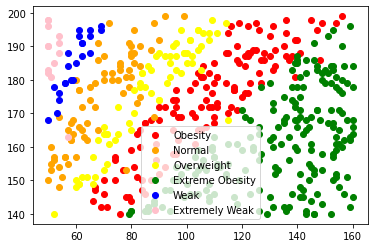

In [19]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#pandas .read_csv 로 비만도.csv 데이터 가져오기
df = pd.read_csv(drive_path + 'bmi_500.csv',index_col='Label')
print(data)


#데이터 가 분류 문제로 풀수있는지 data 분석 

def easy_scatter(label,color):
  for L,C in zip(label,color):
    t = df.loc[L]
    plt.scatter(t['Weight'],t['Height'],c =C,label = L)



color = ['red','orange','yellow','green','blue','pink']
label = df.index.unique()
easy_scatter(label,color)

#plt.figure(figsize=(5,5))
plt.legend()
plt.show()




In [29]:
data =pd.read_csv(drive_path + 'bmi_500.csv')
print(data)
X = data.loc [:,'Height':'Weight']
Y = data.loc[:,'Label']
#train_X ,train_Y test_X test_Y
train_X = X.iloc[:350,:]
test_X = X.iloc[350:,:]

train_Y = Y.iloc[:350]
test_Y = Y.iloc[350:]


     Gender  Height  Weight            Label
0      Male     174      96          Obesity
1      Male     189      87           Normal
2    Female     185     110          Obesity
3    Female     195     104       Overweight
4      Male     149      61       Overweight
..      ...     ...     ...              ...
495  Female     150     153  Extreme Obesity
496  Female     184     121          Obesity
497  Female     141     136  Extreme Obesity
498    Male     150      95  Extreme Obesity
499    Male     173     131  Extreme Obesity

[500 rows x 4 columns]


In [28]:
#분류를 할수 있으면 model 을 만들고 학습 하고 예측 하고 평가 까지 
model = KNeighborsClassifier(n_neighbors=10)
model.fit(train_X,train_Y)
pre = model.predict(test_X)
score = metrics.accuracy_score(test_Y,pre) #testY 랑 예측값을 비교 

print(pre.shape) #예측값이 1차원으로 전부 나온다.
print(score) 


(150,)
0.9333333333333333
